In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb


In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print('train data : {}'.format(len(X_train)))
print('test data : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))# 0 하고 1 있음 0이면 부정 1이면 긍정


17464789/17464789 [==============================] - 0s 0us/step
train data : 25000
test data : 25000
카테고리 : 2


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


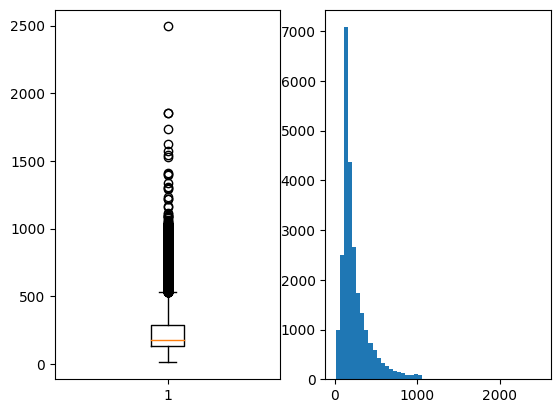

In [3]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()
#대충 100~500 정도의 길이가 많음

In [4]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))
#0과 1 둘다 12500 개

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [5]:
word_to_index = imdb.get_word_index() #각 단어가 어떤 인덱스를 갖는 지 알 수 있음

index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key


1641221/1641221 [==============================] - 0s 0us/step


In [13]:
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))#인덱스 순 = 빈도수 순 인덱스 0 1 2 3 은 특별토큰


빈도수 상위 1등 단어 : the


In [7]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")): #특별 토큰
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))#X_train의 첫 번째 문장


<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [8]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000 # vocab_size 의 수 만큼의 단어 사용
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [9]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_split=0.2)


Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.5461 - acc: 0.7060
Epoch 1: val_acc improved from -inf to 0.75820, saving model to GRU_model.h5
313/313 [==============================] - 370s 1s/step - loss: 0.5461 - acc: 0.7060 - val_loss: 0.4898 - val_acc: 0.7582
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - ETA: 0s - loss: 0.3555 - acc: 0.8530
Epoch 2: val_acc improved from 0.75820 to 0.84360, saving model to GRU_model.h5
313/313 [==============================] - 381s 1s/step - loss: 0.3555 - acc: 0.8530 - val_loss: 0.3619 - val_acc: 0.8436
Epoch 3/10
313/313 [==============================] - ETA: 0s - loss: 0.2875 - acc: 0.8840
Epoch 3: val_acc did not improve from 0.84360
313/313 [==============================] - 397s 1s/step - loss: 0.2875 - acc: 0.8840 - val_loss: 0.5272 - val_acc: 0.7658
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 0.2466 - acc: 0.9049
Epoch 4: val_acc improved from 0.84360 to 0.86560, saving model to GRU_model.h5
313/313 [==============================] - 384s 1s/step - loss: 0.2466 - acc: 0.9049 - val_loss: 0.3143 - val_acc: 0.8656
Epoch 5/10
313/313 [==============================] - ETA: 0s - loss: 0.2096 - acc: 0.9202
Epoch 5: val_acc did not improve from 0.86560
313/313 [====================

In [14]:
loaded_model = load_model('GRU_model.h5')#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 102s 130ms/step - loss: 0.3266 - acc: 0.8781

 테스트 정확도: 0.8781


In [15]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))


In [16]:
test_input ="fucking!!!!!! it's terrible"
sentiment_predict(test_input)

1/1 [==============================] - 0s 434ms/step
86.01% 확률로 부정 리뷰입니다.
